In [1]:
import joblib
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import scikitplot as skplt
from scipy.stats import ks_2samp
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    mean_squared_error,
    precision_score,
    r2_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
import scipy

print(scipy.__version__)

1.11.4


In [3]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [2]:
phishData = pd.read_csv("./PhishingData.csv")
phishData.loc[:, "EmailType"] = 1  #Phish Email
phishData

,Index,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang,EmailType
0,<000cab25-bb13-4475-bc2c-f4d6433e02e9@VI1EUR0...,0,0,0,0,0,0,1,0,3,0,1,0,Test Your Luck Today could be your lucky da...,en,1
1,<0093aa41-b6e9-407c-a7ba-8e09e54b9259@MW2NAM1...,0,0,0,0,0,0,1,0,0,0,4,0,Microsoft account Unusual sign in activity ...,en,1
2,<010001873de042bd-26b4aa2f-4df1-47eb-8ec3-21a...,0,0,0,0,0,0,0,0,0,0,0,0,Don t miss your chance to claim your BLUR ...,en,1
3,<0107018b45a7b187-4598658e-7003-4489-9e37-98e...,0,0,0,0,0,0,0,0,0,0,0,0,Claim your airdrop ...,en,1
4,<0108018b0ba35476-34fe8957-ef09-43dd-bf6d-44b...,0,0,0,0,0,0,0,0,0,0,0,0,Claim your airdrop ...,en,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,I2,0,0,0,0,0,0,0,0,0,0,2,0,Hello Friend How are you and your family...,en,1
1976,I4,0,0,0,0,0,0,1,0,0,0,9,0,Hey phishing pot I have to share bad news wi...,en,1
1977,I6,0,0,0,0,0,0,1,0,2,0,1,1,Hi i write u along time How are u ...,en,1
1978,KsXJIQrY123318_J4b6I86d2vf2E6801xT.4H7f533832C...,0,0,0,0,0,1,1,0,1,0,0,1,Special Offer Enjoy a Discount on Your Nex...,en,1


In [3]:
#phishData[["DKIM",'SPF','DMARC','ARC']] = 1
phishData.head(10)

,Index,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang,EmailType
0,<000cab25-bb13-4475-bc2c-f4d6433e02e9@VI1EUR0...,1,1,1,1,0,0,1,0,3,0,1,0,Test Your Luck Today could be your lucky da...,en,1
1,<0093aa41-b6e9-407c-a7ba-8e09e54b9259@MW2NAM1...,1,1,1,1,0,0,1,0,0,0,4,0,Microsoft account Unusual sign in activity ...,en,1
2,<010001873de042bd-26b4aa2f-4df1-47eb-8ec3-21a...,1,1,1,1,0,0,0,0,0,0,0,0,Don t miss your chance to claim your BLUR ...,en,1
3,<0107018b45a7b187-4598658e-7003-4489-9e37-98e...,1,1,1,1,0,0,0,0,0,0,0,0,Claim your airdrop ...,en,1
4,<0108018b0ba35476-34fe8957-ef09-43dd-bf6d-44b...,1,1,1,1,0,0,0,0,0,0,0,0,Claim your airdrop ...,en,1
5,<0133b796-ea8a-4aca-9964-69eb1e642c33@VI1EUR0...,1,1,1,1,0,0,1,0,4,0,3,0,Facebook Hi phishing pot Someone tried to...,en,1
6,<014206a1-aacc-4140-99d4-a0e2f7204f59@BN8NAM0...,1,1,1,1,0,0,1,0,0,0,4,0,Microsoft account Unusual sign in activity ...,en,1
7,<019cfd04-5bf6-4013-828e-14e2a359cf44@VI1EUR0...,1,1,1,1,0,0,1,0,11,0,5,0,The Few Minutes CouId SaveYou Hundreds Mail ac...,en,1
8,<01b046e7-624f-4fac-a212-16aa7576a019@VI1EUR0...,1,1,1,1,0,0,1,0,0,0,4,0,Microsoft account Unusual sign in activity ...,en,1
9,<023baf3e-2807-43e6-9bf1-d4ab00d50c5a@HE1EUR0...,1,1,1,1,0,0,1,0,11,0,5,0,The Few Minutes CouId SaveYou Hundreds Mail ac...,en,1


In [48]:
hamData = pd.read_csv("./HamData2.csv")
hamData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508720 entries, 0 to 508719
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      508720 non-null  object 
 1   DKIM                       508720 non-null  float64
 2   SPF                        508720 non-null  float64
 3   DMARC                      508720 non-null  float64
 4   ARC                        508720 non-null  float64
 5   Body dear word             508720 non-null  float64
 6   Body form                  508720 non-null  float64
 7   Body html                  508720 non-null  float64
 8   Body button                508720 non-null  float64
 9   Number of Links            508720 non-null  float64
 10  Body Verify your account   508720 non-null  float64
 11  Body no of function words  508720 non-null  float64
 12  From eq Return             508720 non-null  float64
 13  Text                       50

In [49]:
hamData.loc[:, "EmailType"] = 0  #Ham Email
hamData[["DKIM","SPF","DMARC","ARC"]] = 1

In [50]:
hamData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508720 entries, 0 to 508719
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      508720 non-null  object 
 1   DKIM                       508720 non-null  int64  
 2   SPF                        508720 non-null  int64  
 3   DMARC                      508720 non-null  int64  
 4   ARC                        508720 non-null  int64  
 5   Body dear word             508720 non-null  float64
 6   Body form                  508720 non-null  float64
 7   Body html                  508720 non-null  float64
 8   Body button                508720 non-null  float64
 9   Number of Links            508720 non-null  float64
 10  Body Verify your account   508720 non-null  float64
 11  Body no of function words  508720 non-null  float64
 12  From eq Return             508720 non-null  float64
 13  Text                       50

In [12]:
allData = hamData.merge(phishData, how="outer")
#allData

In [13]:
hamData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508720 entries, 0 to 508719
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Index                      508720 non-null  object 
 1   DKIM                       508720 non-null  int64  
 2   SPF                        508720 non-null  int64  
 3   DMARC                      508720 non-null  int64  
 4   ARC                        508720 non-null  int64  
 5   Body dear word             508720 non-null  float64
 6   Body form                  508720 non-null  float64
 7   Body html                  508720 non-null  float64
 8   Body button                508720 non-null  float64
 9   Number of Links            508720 non-null  float64
 10  Body Verify your account   508720 non-null  float64
 11  Body no of function words  508720 non-null  float64
 12  From eq Return             508720 non-null  float64
 13  Text                       50

In [14]:
def stemming(emailText: str) -> str:
    stopWords = set(nltk.corpus.stopwords.words("english"))
    wordTokens = nltk.word_tokenize(emailText)
    filteredEmailText = [word for word in wordTokens if word.lower() not in stopWords]
    filteredEmailText = " ".join(filteredEmailText)
    return filteredEmailText

In [8]:
allData.loc[:, "Text"] = allData.loc[:, "Text"].apply(stemming)
allData

,Index,Unnamed: 0,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang,EmailType
0,<000cab25-bb13-4475-bc2c-f4d6433e02e9@VI1EUR0...,NaN,0,0,0,0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,Test Luck Today could lucky day UNSUBSCRIBEcli...,en,1
1,<0093aa41-b6e9-407c-a7ba-8e09e54b9259@MW2NAM1...,NaN,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,Microsoft account Unusual sign activity detect...,en,1
2,<010001873de042bd-26b4aa2f-4df1-47eb-8ec3-21a...,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,miss chance claim BLUR cid image https co jAVd...,en,1
3,<0107018b45a7b187-4598658e-7003-4489-9e37-98e...,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Claim airdrop Shop Name Blur Season Airdrop Re...,en,1
4,<0108018b0ba35476-34fe8957-ef09-43dd-bf6d-44b...,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Claim airdrop Shop Name Blur NFT marketplace p...,en,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510699,I2,NaN,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Hello Friend family today name Jonathan E Okon...,en,1
510700,I4,NaN,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,Hey phishing pot share bad news Approximately ...,en,1
510701,I6,NaN,0,0,0,0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,Hi write u along time u want lick want hard se...,en,1
510702,KsXJIQrY123318_J4b6I86d2vf2E6801xT.4H7f533832C...,NaN,0,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,Special Offer Enjoy Discount Next Order Expres...,en,1


In [15]:
X = allData.iloc[:,1:-1]
Y = allData["EmailType"]

In [16]:
X

,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang
0,0,0,0,0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,Test Your Luck Today could be your lucky da...,en
1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,Microsoft account Unusual sign in activity ...,en
2,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Don t miss your chance to claim your BLUR ...,en
3,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Claim your airdrop ...,en
4,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Claim your airdrop ...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510695,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Hello Friend How are you and your family...,en
510696,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,Hey phishing pot I have to share bad news wi...,en
510697,0,0,0,0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,Hi i write u along time How are u ...,en
510698,0,0,0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,Special Offer Enjoy a Discount on Your Nex...,en


In [31]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
4756    1
4757    1
4758    1
4759    1
4760    1
Name: EmailType, Length: 4761, dtype: int64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  #random selection on each run and a split of 80:20 for the train:test data
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(510700, 14)
(408560, 14)
(102140, 14)


In [18]:
X_train

,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang
473585,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,As discussed please see attached revised spec...,en
120614,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tom Taniguchi the Nikkei Business reporter h...,en
502330,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Robb Kathy KRobb hunton com writes to th...,en
139955,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Didn t you say mapquest said it takes around ...,en
440690,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,We have been working closely with the Trade Pr...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Do you understand that this is the case The...,en
365838,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Steve I ve attached the results of the focus ...,en
131932,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I ve found CompareRite to work with long docum...,en
146867,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,o k I checked out to mw deal however Prebo...,en


In [19]:
def applyFeatureAndFit(value):
    return featureExtraction.fit_transform([value])

In [20]:
def applyFeature(value):
    return featureExtraction.transform([value])

In [21]:
featureExtraction = TfidfVectorizer(max_features=500, min_df=5, max_df=0.7, stop_words="english")
featuresTrain = featureExtraction.fit_transform(X_train["Text"])
featuresTrainArray = featuresTrain.toarray()
X_train_tfidf_df = pd.DataFrame(featuresTrainArray, columns=featureExtraction.get_feature_names_out(), index=X_train.index)
X_train_combined = pd.concat([X_train, X_train_tfidf_df], axis=1)
X_train_combined = X_train_combined.drop(["Lang","Text"], axis=1)



In [22]:
X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408560 entries, 473585 to 121958
Columns: 512 entries, DKIM to york
dtypes: float64(508), int64(4)
memory usage: 1.6 GB


In [23]:
featuresTest = featureExtraction.transform(X_test["Text"])
featuresTestArray = featuresTest.toarray()
X_test_tfidf_df = pd.DataFrame(featuresTestArray, columns=featureExtraction.get_feature_names_out(), index=X_test.index)
X_test_combined = pd.concat([X_test, X_test_tfidf_df], axis=1)
X_test_combined = X_test_combined.drop(["Lang","Text"], axis=1)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [39]:
Z_train = X_train.iloc[:,:-1]
W = pd.DataFrame(X_train.Text.values.tolist(), index=X_train.index)
W

,0
1786,Forwarded Nev Dull nev sleepycat com Forwarded...
3095,Adam L Beberg wrote Fair use needs clarified b...
1705,RPMS http www dudex net rpms could useful one ...
1402,frequency laptop disk chirps indication say ha...
1896,Thanks Brent clearer needed used global sort J...
...,...
4426,Netflix account suspended Please Update Paymen...
466,order shipped soon feasible processed item ite...
3092,Doom based peer peer architecture says CmdrTac...
3772,use Perl Daily Headline Mailer Week perl porte...


In [40]:
X_test.head(5)

,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text,Lang
2314,0,0,0,0,0,0,0,0,0,0,1,0,URL http www newsisfree com click Date Doc Brown,en
315,1,1,1,1,0,0,1,0,4,0,8,0,Mach mit beim Spa Bitte schau dir mein Profil ...,en
2329,0,0,0,0,0,0,0,0,0,0,1,0,URL http www newsisfree com click Date Society...,en
472,1,1,1,1,0,0,0,0,0,0,1,1,belowView margin top px Adjust value needed He...,en
534,1,1,1,1,0,0,0,0,0,0,0,0,De Miss Altynay lienhe stb com vn Enviado sext...,en


In [11]:
X_train_combined = X_train.drop(["Lang","Text"], axis=1)
X_test_combined = X_test.drop(["Lang","Text"], axis=1)

In [146]:
counts = Y_train.value_counts()
counts

EmailType
0    1948
1    1384
Name: count, dtype: int64

In [24]:
model = LogisticRegression()
model.fit(X_train_combined, Y_train)

LogisticRegression()

In [25]:
predictionTrainingData = model.predict(X_train_combined)
accOnTrainingData = accuracy_score(Y_train, predictionTrainingData)

In [26]:
print(accOnTrainingData)

0.9994394948110437


In [27]:
predictionTestData = model.predict(X_test_combined)
accOnTestData = accuracy_score(Y_test, predictionTestData)
precisionTestData = precision_score(Y_test, predictionTestData)
recallTestData = recall_score(Y_test, predictionTestData)
f1TestData = f1_score(Y_test, predictionTestData)
print(f"Accuracy: {accOnTestData}")
print(f"Precision: {precisionTestData}")
print(f"Recall: {recallTestData}")
print(f"F1 Score: {f1TestData}")

Accuracy: 0.9994321519483063
Precision: 1.0
Recall: 0.8592233009708737
F1 Score: 0.9242819843342036


In [28]:
mse = mean_squared_error(y_true=Y_test, y_pred=predictionTestData)
r2 = r2_score(y_true=Y_test, y_pred=predictionTestData)
print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 0.0005678480516937537
R2: 0.8586531531256394


In [30]:
Y_predProb = model.predict_proba(X_test_combined)
print(Y_predProb)

[[9.99750699e-01 2.49300833e-04]
 [9.99267645e-01 7.32354764e-04]
 [9.98009481e-01 1.99051911e-03]
 ...
 [9.99404368e-01 5.95631797e-04]
 [9.99532003e-01 4.67997233e-04]
 [9.99406939e-01 5.93060679e-04]]


In [31]:
auc = roc_auc_score(Y_test, Y_predProb[:,1])
print(f"AUC: {auc}")

AUC: 0.9969915372079209


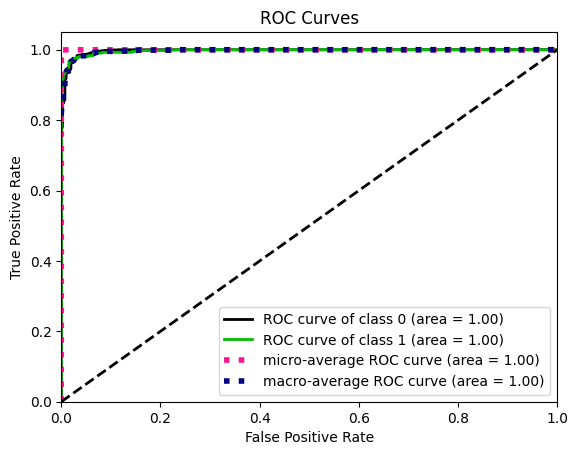

In [32]:
skplt.metrics.plot_roc(Y_test, Y_predProb)
plt.show()

In [33]:
def evaluate_ks(y_real, y_proba):
    df = pd.DataFrame()
    df["real"] = y_real
    df["proba"] = y_proba[:, 1]
    class0 = df[df["real"] == 0]
    class1 = df[df["real"] == 1]
    ks = ks_2samp(class0["proba"], class1["proba"])
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")

evaluate_ks(Y_test, Y_predProb)

KS: 0.9515 (p-value: 0.000e+00)


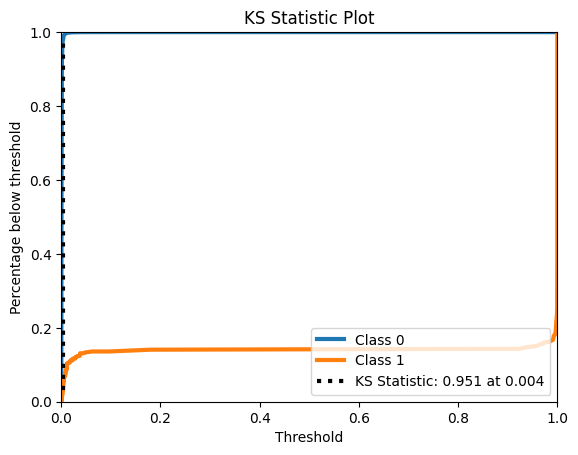

In [34]:
skplt.metrics.plot_ks_statistic(Y_test, Y_predProb)
plt.show()

In [27]:
print(featuresTest)

  (4, 2314)	1.0
  (7, 954)	1.0
  (8, 473)	0.2581988897471611
  (8, 1239)	0.5163977794943222
  (8, 1570)	0.2581988897471611
  (8, 2481)	0.5163977794943222
  (8, 2587)	0.5163977794943222
  (8, 2655)	0.2581988897471611
  (15, 235)	0.8574929257125442
  (15, 518)	0.5144957554275265
  (18, 1377)	0.5547001962252291
  (18, 2425)	0.8320502943378437
  (20, 664)	1.0
  (29, 2620)	1.0
  (32, 2703)	1.0
  (34, 2513)	1.0
  (43, 1084)	0.5547001962252291
  (43, 2957)	0.8320502943378437
  (48, 625)	0.7071067811865476
  (48, 1917)	0.7071067811865476
  (75, 1693)	1.0
  (80, 1249)	1.0
  (94, 1214)	1.0
  (100, 2620)	1.0
  (106, 2238)	1.0
  :	:
  (1250, 413)	1.0
  (1260, 1245)	1.0
  (1261, 1893)	0.7071067811865476
  (1261, 2671)	0.7071067811865476
  (1265, 1714)	1.0
  (1266, 238)	1.0
  (1289, 205)	0.8728715609439696
  (1289, 320)	0.2182178902359924
  (1289, 2013)	0.4364357804719848
  (1299, 2124)	1.0
  (1305, 904)	1.0
  (1319, 928)	1.0
  (1321, 2620)	1.0
  (1327, 70)	1.0
  (1330, 353)	1.0
  (1332, 903)	0.8944

In [35]:
joblib.dump(featureExtraction, "./Tfidf_Vectorizer3.pkl")

['./Tfidf_Vectorizer3.pkl']

In [36]:
joblib.dump(model, "./LogisticRegression2.pkl")

['./LogisticRegression2.pkl']

In [37]:
X_train2 = X_train.drop(["Lang"], axis=1)
X_train2

,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text
473585,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,As discussed please see attached revised spec...
120614,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tom Taniguchi the Nikkei Business reporter h...
502330,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Robb Kathy KRobb hunton com writes to th...
139955,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Didn t you say mapquest said it takes around ...
440690,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,We have been working closely with the Trade Pr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Do you understand that this is the case The...
365838,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Steve I ve attached the results of the focus ...
131932,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I ve found CompareRite to work with long docum...
146867,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,o k I checked out to mw deal however Prebo...


,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text
501761,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,hacker ( HACK-uhr ) noun 1 . person enjoys exp...
226762,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Oh 're listed alright . found Men 's 20-24 . t...
188925,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,EFF_DT PORTFOLIO_ID DOWN95 1/19/01 MANAGEMENT-...
437025,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,someone works 's applied position Duke . n't k...
485192,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,"Mark , See message , Susan Gill . attached rev..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"required Houston Fire Department , fire drill ..."
365838,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Enron reaches new highs ( 82 ) , hope took adv..."
131932,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Frank : recently rethought treatment Western c...
146867,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,"read email , please click . Earnings.com - CPN..."


In [38]:
X_test2 = X_test.drop(["Lang"], axis=1)
X_test2

,DKIM,SPF,DMARC,ARC,Body dear word,Body form,Body html,Body button,Number of Links,Body Verify your account,Body no of function words,From eq Return,Text
320159,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I would love to visit with you about a rotatio...
400914,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Gerry Per our conversation I am requesting ...
482373,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sure you can Mark Guzman enron com ...
293511,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,John I put together a presentation of the si...
117417,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Forwarded by Lorraine B...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510279,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,The main thing is to have time to withdraw you...
286328,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yeah you like that Aren t you just little mi...
317416,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Date Call in Pass Code Conf Rm ...
352616,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Dave I thought you needed him to carry two p...


In [179]:
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self
    def transform(self, X, y=None, **fit_params):
        return X.toarray()

In [43]:

preprocessor = ColumnTransformer(
    transformers=[
        ("Text", TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7), "Text"),
    ],
    remainder="passthrough",
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(bootstrap=True, class_weight=None, criterion="gini",
             max_depth=None, max_features="sqrt", max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)),
])

pipeline.fit(X_train2, Y_train)

y_pred = pipeline.predict(X_test2)

acc = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9997748188760525
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101728
           1       1.00      0.94      0.97       412

    accuracy                           1.00    102140
   macro avg       1.00      0.97      0.99    102140
weighted avg       1.00      1.00      1.00    102140



In [44]:
print(pipeline.steps[1])

('classifier', RandomForestClassifier(n_estimators=50, n_jobs=2))


In [46]:
for name, score in zip(pipeline.steps[0][1].get_feature_names_out(),pipeline.steps[1][1].feature_importances_):
    print(f"{name} : {score}")

Text__able : 0.00021726590731340755
Text__about : 0.00047722379058795684
Text__above : 0.0001270049010013179
Text__access : 0.0005691447876704371
Text__according : 0.00010415928473525102
Text__account : 0.008988361293805872
Text__accounting : 3.0192834302639834e-05
Text__act : 0.0004977095760682681
Text__action : 0.0004278155512102405
Text__activities : 0.00018927942894474728
Text__add : 0.00019283415580593287
Text__added : 0.00017849891088982594
Text__addition : 1.9553177298802498e-06
Text__additional : 0.0001804514338632956
Text__address : 0.003149210741853054
Text__administration : 0.0006199023352046025
Text__after : 0.00033103691962049
Text__afternoon : 3.4390665197802814e-05
Text__again : 0.00015081561708728099
Text__against : 0.0003309734585347878
Text__ago : 0.000813082190042154
Text__agree : 3.4096731265807666e-05
Text__agreed : 3.4514537699480224e-06
Text__agreement : 6.5539425370962e-05
Text__agreements : 0.0
Text__air : 9.14973814915046e-05
Text__align : 0.000290223032506617

In [47]:
joblib.dump(pipeline, "./RandomForestClassifier.pkl")

['./RandomForestClassifier.pkl']

In [199]:
mode = RandomForestClassifier(n_estimators=10)
mode.fit(X_train2, Y_train)
y_pred = mode.predict(X_test2)
acc = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Classification Report:\n{report}")

Accuracy: 0.993704092339979
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       551
           1       0.99      0.99      0.99       402

    accuracy                           0.99       953
   macro avg       0.99      0.99      0.99       953
weighted avg       0.99      0.99      0.99       953



In [3]:
model2 = joblib.load("./RandomForestClassifier.pkl")

In [18]:
for row in phishData.iterrows():
    model2.predict(row)
    break

ValueError: Expected 2D array, got 1D array instead:
array=[0
 Index                         <000cab25-bb13-4475-bc2c-f4d6433e02e9@VI1EUR0...
 DKIM                                                                         0
 SPF                                                                          0
 DMARC                                                                        0
 ARC                                                                          0
 Body dear word                                                               0
 Body form                                                                    0
 Body html                                                                    1
 Body button                                                                  0
 Number of Links                                                              3
 Body Verify your account                                                     0
 Body no of function words                                                    1
 From eq Return                                                               0
 Text                         Test Your Luck    Today could be your lucky da...
 Lang                                                                        en
 EmailType                                                                    1
 Name: 0, dtype: object                                                        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
model2.predict(phishData.iloc[[0,1,2]])

array([1, 1, 1])